In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
from importlib import reload
import shlex
import medvqa
from medvqa.train_visual_module import debug_main

In [69]:
reload(medvqa.datasets.image_processing)
reload(medvqa.datasets.dataloading_utils)
reload(medvqa.datasets.chexpert.chexpert_vision_dataset_management)
reload(medvqa.training.vision)
reload(medvqa.train_visual_module)
reload(medvqa.datasets.data_inspection_utils)

<module 'medvqa.datasets.data_inspection_utils' from '/home/pamessina/medvqa/medvqa/datasets/data_inspection_utils.py'>

In [105]:
output = debug_main(args=shlex.split(
    ' '.join([
        '--iuxray-preprocessed-data-filename "iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl"',
        '--mimiccxr-preprocessed-data-filename "mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl"',
        '--epochs 100',
        '--batches-per-epoch 200',
        '--batch-size 160',
        '--num-workers 7',
        '--lr-decay-patience 3',
        '--classify-orientation',
        '--classify-chexpert',
        '--iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220607_231729.pkl"',
        '--mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220607_231820.pkl"',
        '--classify-questions',
        '--n-questions 97',
        '--iuxray-question-labels-filename "question_labels_per_report__20220607_225035.pkl"',
        '--mimiccxr-question-labels-filename "question_labels_per_report__20220607_225036.pkl"',
        '--imagenet-pretrained',
        '--img-aug-mode "random-spatial"',
        '--use-amp',
        '--no-save',
    ])
))

script's arguments:
   epochs: 100
   batches_per_epoch: 200
   checkpoint_folder: None
   iuxray_preprocessed_data_filename: iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl
   mimiccxr_preprocessed_data_filename: mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl
   image_local_feat_size: 1024
   imagenet_pretrained: True
   densenet_pretrained_weights_path: None
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 3
   batch_size: 160
   num_workers: 7
   device: GPU
   img_aug_mode: random-spatial
   mimiccxr_weight: 1.0
   chexpert_weight: 1.0
   iuxray_weight: 0.05
   use_amp: True
   pretrained_checkpoint_folder_path: None
   one_question_per_batch: False
   save: False
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   train_chexpert: True
   classify_tags: False
   n_medical_tags: None
   iuxray_rid2tags_filename: None
   mimiccxr_rid2tags_filename: None
   classify_orientation: True
   classify_chexpert: True
   iuxray_c

In [5]:
output.keys()

dict_keys(['chexpert_vision_trainer', 'mimiccxr_vision_trainer', 'iuxray_vision_trainer'])

In [70]:
from medvqa.datasets.data_inspection_utils import (
    inspect_chexpert_vision_trainer,
    inspect_iuxray_vision_trainer,
    inspect_mimiccxr_vision_trainer,
)

idx: 222259
chexpert labels: [0 0 0 0 0 1 0 0 1 0 1 0 0 1]
chexpert labels (verbose): Edema, Atelectasis, Pleural Effusion, Support Devices
orientation: 0 FrontalAP
sex: 1 Male
image from tensor:


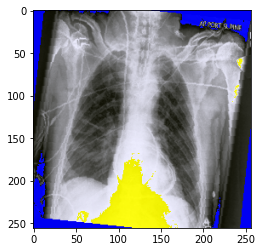

image from path:
/mnt/workspace/chexpert/CheXpert-v1.0-small/train/patient63508/study1/view1_frontal.jpg


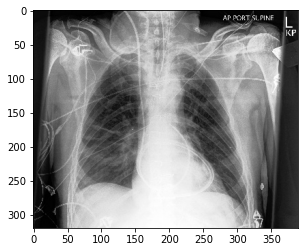

In [46]:
inspect_chexpert_vision_trainer(output['chexpert_vision_trainer'], 2000)

In [63]:
from collections import Counter

idx: 5981
chexpert labels: [0 1 0 0 0 0 0 0 0 0 0 0 1 0]
chexpert labels (verbose): Enlarged Cardiomediastinum, Fracture
orientation: 2
question labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
image from tensor:


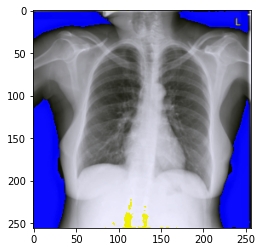

image from path:
/mnt/workspace/iu-x-ray/dataset/images/CXR1764_IM-0498-1001.png


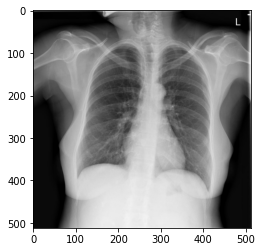

In [71]:
inspect_iuxray_vision_trainer(output['iuxray_vision_trainer'], 'validation', 10)

idx: 341478
chexpert labels: [0 0 0 1 1 0 0 1 0 0 1 0 0 1]
chexpert labels (verbose): Lung Lesion, Lung Opacity, Pneumonia, Pleural Effusion, Support Devices
orientation: 2
question labels: [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
image from tensor:


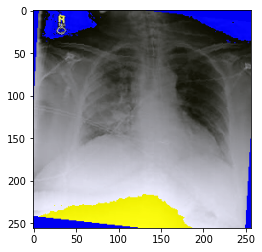

image from path:
/mnt/workspace/mimic-cxr-jpg/images-small/p11/p11310752/s59178508/7e22d2a9-bceb3c45-968c76c3-e359234c-bb77bb23.jpg


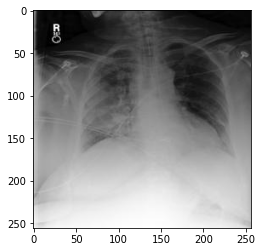

In [101]:
inspect_mimiccxr_vision_trainer(output['mimiccxr_vision_trainer'], 'train', 100)

In [19]:
!python ../train_visual_module.py \
        --iuxray-preprocessed-data-filename "iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl" \
        --mimiccxr-preprocessed-data-filename "mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl" \
        --epochs 2 \
        --batches-per-epoch 300 \
        --batch-size 160 \
        --num-workers 7 \
        --lr-decay-patience 3 \
        --classify-orientation \
        --classify-chexpert \
        --iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220607_231729.pkl" \
        --mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220607_231820.pkl" \
        --classify-questions \
        --n-questions 97 \
        --iuxray-question-labels-filename "question_labels_per_report__20220607_225035.pkl" \
        --mimiccxr-question-labels-filename "question_labels_per_report__20220607_225036.pkl" \
        --imagenet-pretrained \
        --img-aug-mode "random-spatial" \
        --use-amp \
        --save

script's arguments:
   epochs: 100
   batches_per_epoch: 300
   checkpoint_folder: None
   iuxray_preprocessed_data_filename: iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl
   mimiccxr_preprocessed_data_filename: mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl
   image_local_feat_size: 1024
   imagenet_pretrained: True
   densenet_pretrained_weights_path: None
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 3
   batch_size: 160
   num_workers: 7
   device: GPU
   img_aug_mode: random-spatial
   mimiccxr_weight: 1.0
   chexpert_weight: 0.8
   iuxray_weight: 0.08
   use_amp: True
   pretrained_checkpoint_folder_path: None
   one_question_per_batch: False
   save: True
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   train_chexpert: True
   classify_tags: False
   n_medical_tags: None
   iuxray_rid2tags_filename: None
   mimiccxr_rid2tags_filename: None
   classify_orientation: True
   classify_chexpert: True
   iuxray_ch

oracc 0.99850, chxlmicf1 0.38833, chxlmacf1 0.23004, chxlacc 0.82787, chxlrocauc 0.81156, qlf1 0.54027, 3.86 secs
---- Epoch 11/100
(1) Training stage (lr = 0.001000) ...
loss 0.53766, orien_loss 0.00217, oracc 0.99256, chx_loss 0.38818, chxlmicf1 0.52229, chxlmacf1 0.29977, chxlacc 0.83579, chxlrocauc 0.83976, ql_loss 0.21986, qlf1 0.52812, gloss 0.09946, gacc 0.96202, 128.60 secs
(2) Validation stage ...
oracc 0.99550, chxlmicf1 0.36300, chxlmacf1 0.23350, chxlacc 0.82095, chxlrocauc 0.78939, qlf1 0.53126, 3.92 secs
---- Epoch 12/100
(1) Training stage (lr = 0.001000) ...
loss 0.58790, orien_loss 0.00234, oracc 0.99416, chx_loss 0.36916, chxlmicf1 0.52566, chxlmacf1 0.30457, chxlacc 0.83750, chxlrocauc 0.84155, ql_loss 0.21812, qlf1 0.52842, gloss 0.08416, gacc 0.96880, 128.41 secs
(2) Validation stage ...
oracc 0.98801, chxlmicf1 0.44396, chxlmacf1 0.26533, chxlacc 0.82478, chxlrocauc 0.80309, qlf1 0.53175, 3.89 secs
---- Epoch 13/100
(1) Training stage (lr = 0.001000) ...
loss 0.43

oracc 0.99100, chxlmicf1 0.37770, chxlmacf1 0.24249, chxlacc 0.82819, chxlrocauc 0.81113, qlf1 0.56256, 3.97 secs
---- Epoch 31/100
(1) Training stage (lr = 0.001000) ...
loss 0.58983, orien_loss 0.00281, oracc 0.99642, chx_loss 0.36796, chxlmicf1 0.55062, chxlmacf1 0.33448, chxlacc 0.84230, chxlrocauc 0.85496, ql_loss 0.21065, qlf1 0.54360, gloss 0.05469, gacc 0.97971, 129.39 secs
(2) Validation stage ...
oracc 0.99100, chxlmicf1 0.44765, chxlmacf1 0.27027, chxlacc 0.83266, chxlrocauc 0.81287, qlf1 0.56451, 3.91 secs
---- Epoch 32/100
(1) Training stage (lr = 0.001000) ...
loss 0.39160, orien_loss 0.00418, oracc 0.99594, chx_loss 0.33176, chxlmicf1 0.55007, chxlmacf1 0.33583, chxlacc 0.84235, chxlrocauc 0.85539, ql_loss 0.21084, qlf1 0.54265, gloss 0.06178, gacc 0.97767, 129.52 secs
(2) Validation stage ...
oracc 0.98651, chxlmicf1 0.44573, chxlmacf1 0.26818, chxlacc 0.83106, chxlrocauc 0.80688, qlf1 0.52675, 3.89 secs
---- Epoch 33/100
(1) Training stage (lr = 0.001000) ...
loss 0.57

oracc 0.99700, chxlmicf1 0.50427, chxlmacf1 0.32199, chxlacc 0.83926, chxlrocauc 0.82840, qlf1 0.55886, 3.87 secs
---- Epoch 51/100
(1) Training stage (lr = 0.000578) ...
loss 0.42815, orien_loss 0.03050, oracc 0.99702, chx_loss 0.35960, chxlmicf1 0.58525, chxlmacf1 0.39481, chxlacc 0.85165, chxlrocauc 0.87295, ql_loss 0.20193, qlf1 0.56103, gloss 0.03117, gacc 0.98946, 129.26 secs
(2) Validation stage ...
oracc 0.99550, chxlmicf1 0.47203, chxlmacf1 0.29342, chxlacc 0.83021, chxlrocauc 0.80449, qlf1 0.55743, 3.93 secs
---- Epoch 52/100
(1) Training stage (lr = 0.000578) ...
loss 0.56003, orien_loss 0.00183, oracc 0.99686, chx_loss 0.36097, chxlmicf1 0.58400, chxlmacf1 0.39228, chxlacc 0.85161, chxlrocauc 0.87380, ql_loss 0.20156, qlf1 0.56082, gloss 0.03204, gacc 0.98889, 129.02 secs
(2) Validation stage ...
oracc 1.00000, chxlmicf1 0.51357, chxlmacf1 0.31279, chxlacc 0.83968, chxlrocauc 0.83265, qlf1 0.55670, 3.97 secs
---- Epoch 53/100
(1) Training stage (lr = 0.000578) ...
loss 0.39

oracc 0.99100, chxlmicf1 0.46122, chxlmacf1 0.31674, chxlacc 0.83585, chxlrocauc 0.82221, qlf1 0.56023, 3.95 secs
---- Epoch 71/100
(1) Training stage (lr = 0.000334) ...
loss 0.53875, orien_loss 0.04917, oracc 0.99728, chx_loss 0.29334, chxlmicf1 0.62130, chxlmacf1 0.46612, chxlacc 0.86144, chxlrocauc 0.89013, ql_loss 0.19361, qlf1 0.58143, gloss 0.01564, gacc 0.99562, 128.99 secs
(2) Validation stage ...
oracc 0.99400, chxlmicf1 0.48798, chxlmacf1 0.32152, chxlacc 0.83447, chxlrocauc 0.82121, qlf1 0.57014, 3.95 secs
---- Epoch 72/100
(1) Training stage (lr = 0.000334) ...
loss 0.34790, orien_loss 0.00901, oracc 0.99774, chx_loss 0.32418, chxlmicf1 0.62189, chxlmacf1 0.46747, chxlacc 0.86242, chxlrocauc 0.89064, ql_loss 0.19296, qlf1 0.58295, gloss 0.01218, gacc 0.99590, 129.08 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.48918, chxlmacf1 0.32111, chxlacc 0.83660, chxlrocauc 0.82515, qlf1 0.56176, 4.01 secs
---- Epoch 73/100
(1) Training stage (lr = 0.000334) ...
loss 0.54

oracc 0.99850, chxlmicf1 0.46650, chxlmacf1 0.30997, chxlacc 0.83638, chxlrocauc 0.81627, qlf1 0.56545, 3.93 secs
---- Epoch 91/100
(1) Training stage (lr = 0.000193) ...
loss 0.46963, orien_loss 0.00005, oracc 0.99839, chx_loss 0.27825, chxlmicf1 0.65276, chxlmacf1 0.53302, chxlacc 0.87157, chxlrocauc 0.90362, ql_loss 0.18669, qlf1 0.59806, gloss 0.00638, gacc 0.99745, 128.78 secs
(2) Validation stage ...
oracc 0.99550, chxlmicf1 0.46186, chxlmacf1 0.31509, chxlacc 0.83479, chxlrocauc 0.81806, qlf1 0.55515, 3.97 secs
---- Epoch 92/100
(1) Training stage (lr = 0.000193) ...
loss 0.20116, orien_loss 0.00000, oracc 0.99822, chx_loss 0.07213, chxlmicf1 0.65675, chxlmacf1 0.53693, chxlacc 0.87227, chxlrocauc 0.90476, ql_loss 0.18646, qlf1 0.59887, gloss 0.00850, gacc 0.99760, 128.72 secs
(2) Validation stage ...
oracc 0.99250, chxlmicf1 0.49151, chxlmacf1 0.31782, chxlacc 0.83745, chxlrocauc 0.82029, qlf1 0.56319, 3.91 secs
---- Epoch 93/100
(1) Training stage (lr = 0.000193) ...
loss 0.47

In [21]:
!python ../train_visual_module.py \
        --checkpoint-folder "models/visual_module/20220613_082339_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1_use_amp" \
        --epochs 100 \
        --batches-per-epoch 300 \
        --batch-size 160 \
        --num-workers 7 \
        --save

script's arguments:
   epochs: 100
   batches_per_epoch: 300
   checkpoint_folder: models/visual_module/20220613_082339_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1_use_amp
   iuxray_preprocessed_data_filename: None
   mimiccxr_preprocessed_data_filename: None
   image_local_feat_size: 1024
   imagenet_pretrained: False
   densenet_pretrained_weights_path: None
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 2
   batch_size: 160
   num_workers: 7
   device: GPU
   img_aug_mode: None
   mimiccxr_weight: 1.0
   chexpert_weight: 0.8
   iuxray_weight: 0.08
   use_amp: False
   pretrained_checkpoint_folder_path: None
   one_question_per_batch: False
   save: True
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   train_chexpert: True
   classify_tags: False
   n_medical_tags: None
   iuxray_rid2tags_filename: None
   mimiccxr_rid2tags_filename: None
   cl

loss 0.46603, orien_loss 0.00030, oracc 0.99902, chx_loss 0.28426, chxlmicf1 0.67867, chxlmacf1 0.57806, chxlacc 0.87896, chxlrocauc 0.91367, ql_loss 0.18125, qlf1 0.61041, gloss 0.00601, gacc 0.99788, 128.65 secs
(2) Validation stage ...
oracc 0.99250, chxlmicf1 0.47984, chxlmacf1 0.33403, chxlacc 0.83383, chxlrocauc 0.81429, qlf1 0.55520, 3.96 secs
Epoch   110: reducing learning rate of group 0 to 8.4591e-05.
---- Epoch 111/200
(1) Training stage (lr = 0.000085) ...
loss 0.34101, orien_loss 0.00131, oracc 0.99895, chx_loss 0.33724, chxlmicf1 0.67926, chxlmacf1 0.57655, chxlacc 0.87937, chxlrocauc 0.91323, ql_loss 0.18123, qlf1 0.61249, gloss 0.00428, gacc 0.99838, 128.76 secs
(2) Validation stage ...
oracc 0.99250, chxlmicf1 0.47885, chxlmacf1 0.33875, chxlacc 0.83340, chxlrocauc 0.81504, qlf1 0.55911, 3.88 secs
---- Epoch 112/200
(1) Training stage (lr = 0.000085) ...
loss 0.44666, orien_loss 0.00279, oracc 0.99893, chx_loss 0.26582, chxlmicf1 0.68268, chxlmacf1 0.58188, chxlacc 0.8

oracc 0.99700, chxlmicf1 0.47654, chxlmacf1 0.34212, chxlacc 0.83138, chxlrocauc 0.81374, qlf1 0.55582, 3.94 secs
---- Epoch 130/200
(1) Training stage (lr = 0.000049) ...
loss 0.31620, orien_loss 0.00035, oracc 0.99943, chx_loss 0.30699, chxlmicf1 0.69747, chxlmacf1 0.60458, chxlacc 0.88501, chxlrocauc 0.92015, ql_loss 0.17786, qlf1 0.61946, gloss 0.00397, gacc 0.99900, 129.01 secs
(2) Validation stage ...
oracc 0.99700, chxlmicf1 0.47453, chxlmacf1 0.33505, chxlacc 0.83308, chxlrocauc 0.81100, qlf1 0.56484, 3.99 secs
---- Epoch 131/200
(1) Training stage (lr = 0.000049) ...
loss 0.44301, orien_loss 0.00159, oracc 0.99948, chx_loss 0.25941, chxlmicf1 0.69438, chxlmacf1 0.60174, chxlacc 0.88390, chxlrocauc 0.91969, ql_loss 0.17795, qlf1 0.61744, gloss 0.00329, gacc 0.99918, 128.74 secs
(2) Validation stage ...
oracc 0.99700, chxlmicf1 0.48039, chxlmacf1 0.33612, chxlacc 0.83074, chxlrocauc 0.81035, qlf1 0.55779, 3.95 secs
Epoch   131: reducing learning rate of group 0 to 3.7133e-05.
--

loss 0.31425, orien_loss 0.00079, oracc 0.99950, chx_loss 0.31232, chxlmicf1 0.70198, chxlmacf1 0.61397, chxlacc 0.88721, chxlrocauc 0.92295, ql_loss 0.17606, qlf1 0.62383, gloss 0.00291, gacc 0.99919, 128.93 secs
(2) Validation stage ...
oracc 0.99400, chxlmicf1 0.48339, chxlmacf1 0.34582, chxlacc 0.83277, chxlrocauc 0.81002, qlf1 0.56262, 3.90 secs
---- Epoch 150/200
(1) Training stage (lr = 0.000016) ...
loss 0.44987, orien_loss 0.00006, oracc 0.99946, chx_loss 0.26172, chxlmicf1 0.70307, chxlmacf1 0.61658, chxlacc 0.88717, chxlrocauc 0.92312, ql_loss 0.17633, qlf1 0.62440, gloss 0.00235, gacc 0.99933, 129.37 secs
(2) Validation stage ...
oracc 0.99550, chxlmicf1 0.47736, chxlmacf1 0.34018, chxlacc 0.83170, chxlrocauc 0.81043, qlf1 0.56157, 4.06 secs
Epoch   150: reducing learning rate of group 0 to 1.2388e-05.
---- Epoch 151/200
(1) Training stage (lr = 0.000012) ...
loss 0.31630, orien_loss 0.00081, oracc 0.99964, chx_loss 0.31446, chxlmicf1 0.70446, chxlmacf1 0.61581, chxlacc 0.8

### Training-Validation plots

In [24]:
from medvqa.evaluation.plots import plot_train_val_curves
from medvqa.utils.constants import MetricNames

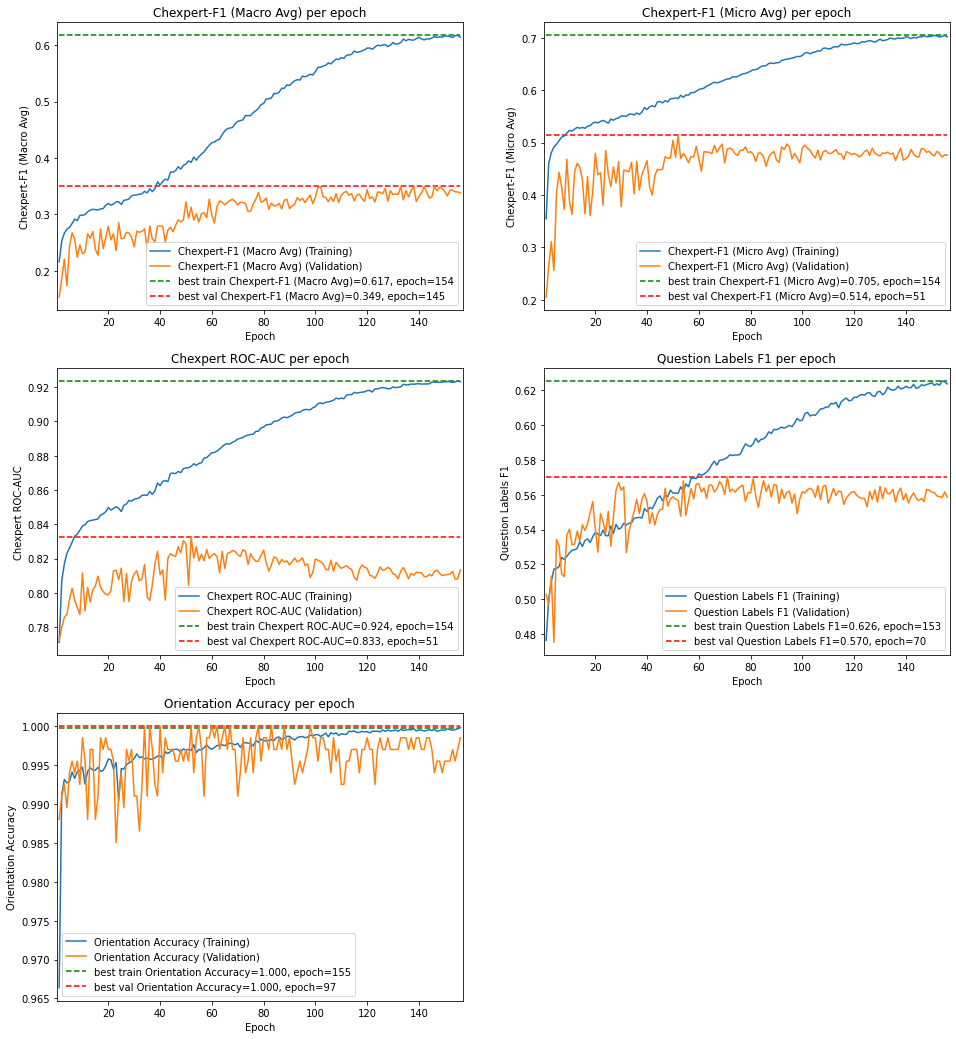

In [25]:
plot_train_val_curves('/home/pamessina/medvqa-workspace/models/visual_module/20220613_082339_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1_use_amp/metrics_logs.csv',
                 [MetricNames.CHXLABELMACROAVGF1, MetricNames.CHXLABELMICROAVGF1,
                  MetricNames.CHXLABEL_ROCAUC, MetricNames.QLABELSF1, MetricNames.ORIENACC],
                 ['Chexpert-F1 (Macro Avg)', 'Chexpert-F1 (Micro Avg)', 'Chexpert ROC-AUC', 'Question Labels F1',
                  'Orientation Accuracy'],
                 single_plot_figsize=(8,6))

# Test Set Evaluation

In [26]:
!python ../eval_visual_module.py \
        --checkpoint-folder "models/visual_module/20220613_082339_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1_use_amp" \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl" \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/visual_module/20220613_082339_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1_use_amp
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl
   batch_size: 160
   device: GPU
   num_workers: 0
   eval_iuxray: True
   eval_mimiccxr: True
   use_amp: False
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/visual_module/20220613_082339_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1_use_amp/metadata.json
1) device = cuda
2) Creating instance of DensenetVisualModule model ...
DenseNet121's pretrained weights loaded from ImageNet
3) Creating evaluator engine ...
4) Defi